In [394]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in data
dataAll = pd.read_csv('/Users/josh/Documents/Code/Data-Test-Life/constituents-financials.csv')
df = pd.read_csv('/Users/josh/Documents/Code/Data-Test-Life/constituents-financials.csv')

In [395]:
# Find missing data, if any.
for col in dataAll.columns:
    pct_missing = np.mean (dataAll[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

Symbol - 0.0%
Name - 0.0%
Sector - 0.0%
Price - 0.0%
Price/Earnings - 0.0039603960396039604%
Dividend Yield - 0.0%
Earnings/Share - 0.0%
52 Week Low - 0.0%
52 Week High - 0.0%
Market Cap - 0.0%
EBITDA - 0.0%
Price/Sales - 0.0%
Price/Book - 0.015841584158415842%
SEC Filings - 0.0%


In [396]:
dataAll.dtypes

Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap          int64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object

<AxesSubplot:>

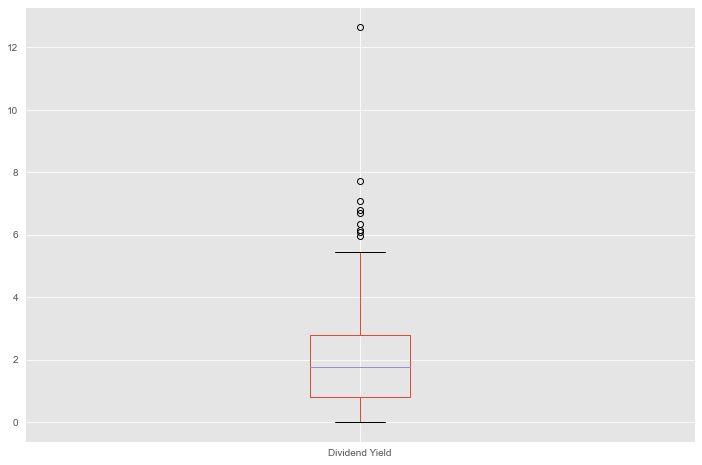

In [397]:
dataAll.boxplot(column=['Dividend Yield'])

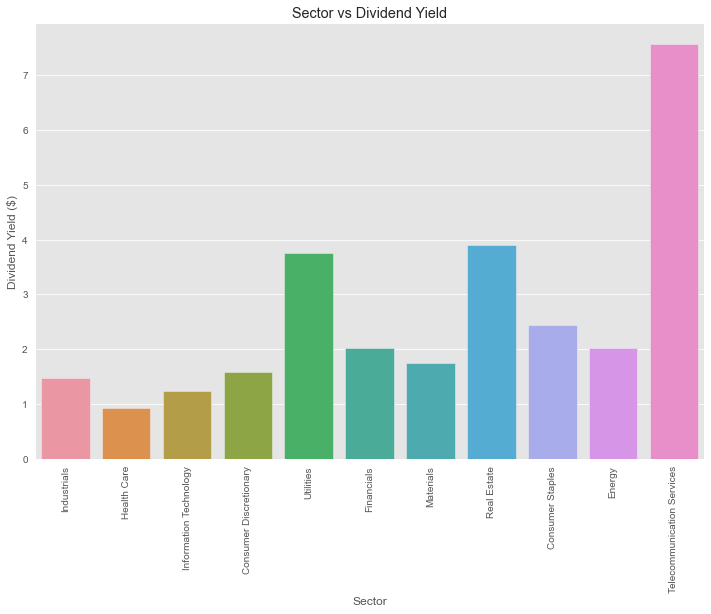

In [398]:
sns.barplot(x='Sector', y='Dividend Yield', data=df, ci=None)

sns.despine(bottom = True)
plt.ylabel('Dividend Yield ($)')
plt.xlabel('Sector')
plt.title('Sector vs Dividend Yield')
plt.xticks(rotation = 'vertical')

plt.show()

In [399]:
dataNumerized = dataAll

for col_name in dataNumerized:
    if(dataNumerized[col_name].dtype == 'object'):
        dataNumerized[col_name] = dataNumerized[col_name].astype('category')
        dataNumerized[col_name] = dataNumerized[col_name].cat.codes

In [400]:
dataNumerized.corr(method = 'pearson')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Symbol,1.000000,0.886485,-0.061845,-0.042507,-0.015953,0.054207,-0.007174,-0.045964,-0.033223,-0.044048,0.017759,-0.008691,0.024311,1.000000
Name,0.886485,1.000000,-0.076285,-0.078240,0.020780,0.034714,-0.032940,-0.083701,-0.068675,-0.102497,-0.059999,-0.010964,0.020591,0.886485
Sector,-0.061845,-0.076285,1.000000,-0.045343,-0.016677,0.258800,-0.052598,-0.043795,-0.026387,-0.001740,0.038881,0.274063,-0.102529,-0.061845
Price,-0.042507,-0.078240,-0.045343,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637,-0.042507
Price/Earnings,-0.015953,0.020780,-0.016677,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366,-0.015953
Dividend Yield,0.054207,0.034714,0.258800,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369,0.054207
Earnings/Share,-0.007174,-0.032940,-0.052598,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254,-0.007174
52 Week Low,-0.045964,-0.083701,-0.043795,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322,-0.045964
52 Week High,-0.033223,-0.068675,-0.026387,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794,-0.033223
Market Cap,-0.044048,-0.102497,-0.001740,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411,-0.044048


In [401]:
dataNumerized.corr(method = 'kendall')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Symbol,1.000000,0.827377,-0.045243,-0.016102,0.009008,0.039316,0.023286,-0.017775,-0.017760,-0.035188,0.003504,0.001619,-0.009067,1.000000
Name,0.827377,1.000000,-0.053824,-0.024321,-0.008897,0.026910,0.013679,-0.028588,-0.026969,-0.034025,-0.008487,-0.000424,-0.010155,0.827377
Sector,-0.045243,-0.053824,1.000000,0.030085,-0.003896,0.111667,-0.041522,0.035126,0.057082,-0.003556,0.044624,0.202841,-0.003122,-0.045243
Price,-0.016102,-0.024321,0.030085,1.000000,0.257568,-0.196549,0.479078,0.930300,0.876082,0.247700,0.093124,0.186516,0.292032,-0.016102
Price/Earnings,0.009008,-0.008897,-0.003896,0.257568,1.000000,-0.283815,-0.024373,0.230878,0.220362,0.094510,-0.003763,0.278395,0.320962,0.009008
Dividend Yield,0.039316,0.026910,0.111667,-0.196549,-0.283815,1.000000,-0.014374,-0.190349,-0.139992,0.043414,0.125811,-0.085593,-0.178379,0.039316
Earnings/Share,0.023286,0.013679,-0.041522,0.479078,-0.024373,-0.014374,1.000000,0.477940,0.484068,0.191223,0.164270,-0.065738,0.110992,0.023286
52 Week Low,-0.017775,-0.028588,0.035126,0.930300,0.230878,-0.190349,0.477940,1.000000,0.879052,0.226925,0.088059,0.180877,0.273475,-0.017775
52 Week High,-0.017760,-0.026969,0.057082,0.876082,0.220362,-0.139992,0.484068,0.879052,1.000000,0.245538,0.100780,0.184810,0.252366,-0.017760
Market Cap,-0.035188,-0.034025,-0.003556,0.247700,0.094510,0.043414,0.191223,0.226925,0.245538,1.000000,0.457720,0.121704,0.124612,-0.035188


In [402]:
dataNumerized.corr(method = 'spearman')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Symbol,1.000000,0.886485,-0.062943,-0.023687,0.012271,0.055975,0.037373,-0.027308,-0.026537,-0.051953,0.005210,0.002936,-0.015992,1.000000
Name,0.886485,1.000000,-0.073118,-0.037042,-0.015048,0.037914,0.022167,-0.042833,-0.040199,-0.050867,-0.011064,-0.001687,-0.014853,0.886485
Sector,-0.062943,-0.073118,1.000000,0.041874,-0.008270,0.164464,-0.058429,0.048969,0.080148,-0.003794,0.057502,0.282495,-0.005148,-0.062943
Price,-0.023687,-0.037042,0.041874,1.000000,0.366903,-0.277735,0.647703,0.990314,0.978032,0.360659,0.136721,0.274326,0.424240,-0.023687
Price/Earnings,0.012271,-0.015048,-0.008270,0.366903,1.000000,-0.393935,-0.033373,0.331841,0.317636,0.139826,-0.000930,0.396376,0.448806,0.012271
Dividend Yield,0.055975,0.037914,0.164464,-0.277735,-0.393935,1.000000,-0.015179,-0.270145,-0.196740,0.059947,0.186381,-0.118969,-0.263413,0.055975
Earnings/Share,0.037373,0.022167,-0.058429,0.647703,-0.033373,-0.015179,1.000000,0.645521,0.655771,0.282527,0.240091,-0.098205,0.163939,0.037373
52 Week Low,-0.027308,-0.042833,0.048969,0.990314,0.331841,-0.270145,0.645521,1.000000,0.978198,0.332196,0.129060,0.267160,0.399315,-0.027308
52 Week High,-0.026537,-0.040199,0.080148,0.978032,0.317636,-0.196740,0.655771,0.978198,1.000000,0.357188,0.146550,0.274875,0.368790,-0.026537
Market Cap,-0.051953,-0.050867,-0.003794,0.360659,0.139826,0.059947,0.282527,0.332196,0.357188,1.000000,0.585038,0.179679,0.183243,-0.051953


In [403]:
correlation_mat = dataNumerized.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Symbol       Symbol            1.000000
             Name              1.000000
             Sector           -0.003237
             Price             0.970730
             Price/Earnings    0.908813
                                 ...   
SEC Filings  Market Cap        1.000000
             EBITDA            0.815843
             Price/Sales       1.000000
             Price/Book        0.762879
             SEC Filings       1.000000
Length: 196, dtype: float64


In [404]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

EBITDA       Sector        -0.072218
Sector       EBITDA        -0.072218
             Price/Book    -0.012871
Price/Book   Sector        -0.012871
Sector       52 Week Low   -0.010814
                              ...   
Price/Sales  Symbol         1.000000
             Name           1.000000
             Market Cap     1.000000
             SEC Filings    1.000000
SEC Filings  SEC Filings    1.000000
Length: 196, dtype: float64


In [405]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Dividend Yield  EBITDA            0.584713
EBITDA          Dividend Yield    0.584713
Dividend Yield  Price/Book        0.597904
Price/Book      Dividend Yield    0.597904
Earnings/Share  Dividend Yield    0.600887
                                    ...   
Price/Sales     Symbol            1.000000
                Name              1.000000
                Market Cap        1.000000
                SEC Filings       1.000000
SEC Filings     SEC Filings       1.000000
Length: 170, dtype: float64


In [412]:
# We will now take a look at the top 10 heighest market cap

topPerformance = df.groupby(['Symbol', 'Sector'])[['Market Cap']].sum()

topPerformanceSorted = topPerformance.sort_values('Market Cap', ascending = False)[:10]

print(topPerformanceSorted)

                                 Market Cap
Symbol Sector                              
AAPL   Information Technology  809508034020
GOOGL  Information Technology  733823966137
GOOG   Information Technology  728535558140
MSFT   Information Technology  689978437468
AMZN   Consumer Discretionary  685873374731
FB     Information Technology  523423036576
JPM    Financials              386613611000
JNJ    Health Care             353062464971
XOM    Energy                  326148660000
BAC    Financials              321478200969


Overall, I was looking for a correlation between the sector and the dividend return. This however seems to not be as important as I initally thought. I believe there is a lot that can be done with this data. I may come back and continue with my search of correlations.